<a href="https://colab.research.google.com/github/srowal/otsu-algo-and-wavelet-transform/blob/main/otsu-wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pywt
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# set paths to images
PATH1 = "/content/drive/MyDrive/tools_noisy.png"
PATH2 = "/content/drive/MyDrive/lena.tif"

# Part 1

In [ ]:
# returns the otsu threshold of the image
def my_otsu(img):
  M, N = img.shape

  # get histogram of image
  hist = cv2.calcHist(images = [img],
                      channels = [0],
                      mask = None,
                      histSize = [256],
                      ranges = [0,256])
  # normalize histogram
  p = hist.ravel()/(M*N)

  # create an array from 0 to 255
  arr_to256 = np.arange(256)

  # elemt wise multiply norm histogram by 0-255 array for efficiency in loop
  value_x_index = p * arr_to256

  cb_variances = np.zeros(256)

  for k in range(256):

    #cummulative sums
    p1 = np.sum(p[0:k])
    p2 = np.sum(p[k:256])

    # needed for division by zero
    if p1 == 0 or p2 == 0:
      continue

    # cummulative means
    m1 = np.sum(value_x_index[0:k]) / p1
    m2 = np.sum(value_x_index[k:256]) / p2

    # class between variance
    cb_variances[k] = p1 * p2 * ((m1 - m2)**2)

  # set threshold to max of class between variance
  T = np.argmax(variances)

  return np.where(img < T, 0, 255)

In [ ]:
# read image
img1_og = cv2.imread(PATH1, cv2.IMREAD_GRAYSCALE)

# A) apply otsu on image
img1_otsu = my_otsu(img1_og)

# B) apply a 5x5 blur followed by otsu
blur = cv2.blur(img1_og, (5,5))
img1_otsu_blur = my_otsu(blur)

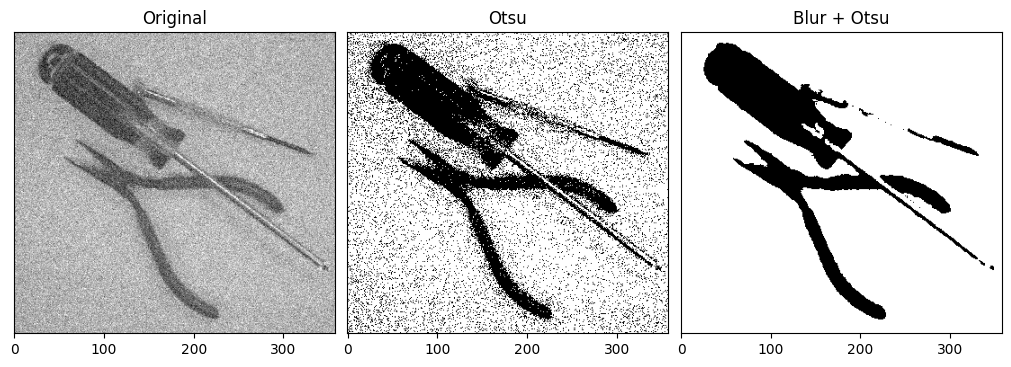

In [ ]:
# plot and compare
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(10,5))
axs[0].imshow(img1_og, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(img1_otsu, cmap="gray")
axs[1].set_title("Otsu")
axs[2].imshow(img1_otsu_blur, cmap="gray")
axs[2].set_title("Blur + Otsu")

for ax in axs:
  ax.set_yticks([])

# Part 2


https://pywavelets.readthedocs.io/en/latest/ref/index.html


In [ ]:
# read the image
img2_og = cv2.imread(PATH2, cv2.IMREAD_GRAYSCALE)

In [ ]:
# plots approximation and detail of wavelet transforms
def plot_waves(data, Title):
  approx = data[0]
  details = data[1]

  subtitles = ["Approximation", "Horizontal Detail", "Vertical Detail", "Diagonal Detail"]
  fig, axs = plt.subplots(1,4, figsize=(16,5), constrained_layout=True)
  fig.suptitle(Title)

  axs[0].imshow(approx, cmap="gray")
  axs[0].set_title(subtitles[0])
  axs[0].set_yticks([])

  for i in range(1,4):
    axs[i].imshow(details[i-1], cmap="gray")
    axs[i].set_title(subtitles[i])
    axs[i].set_yticks([])

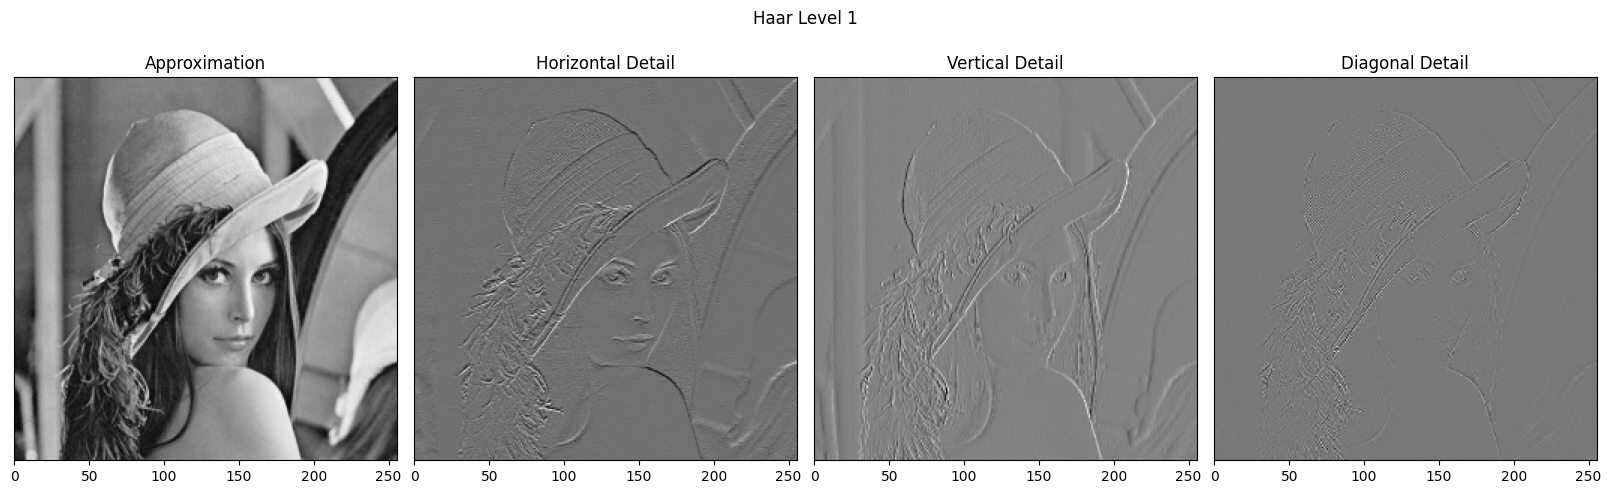

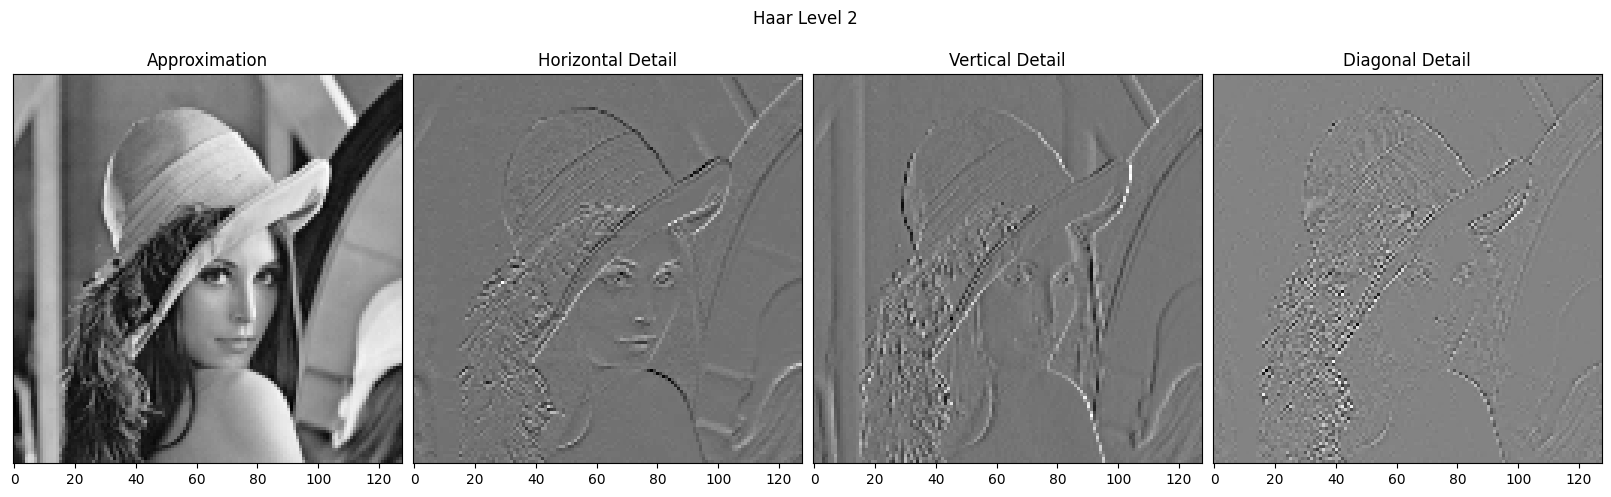

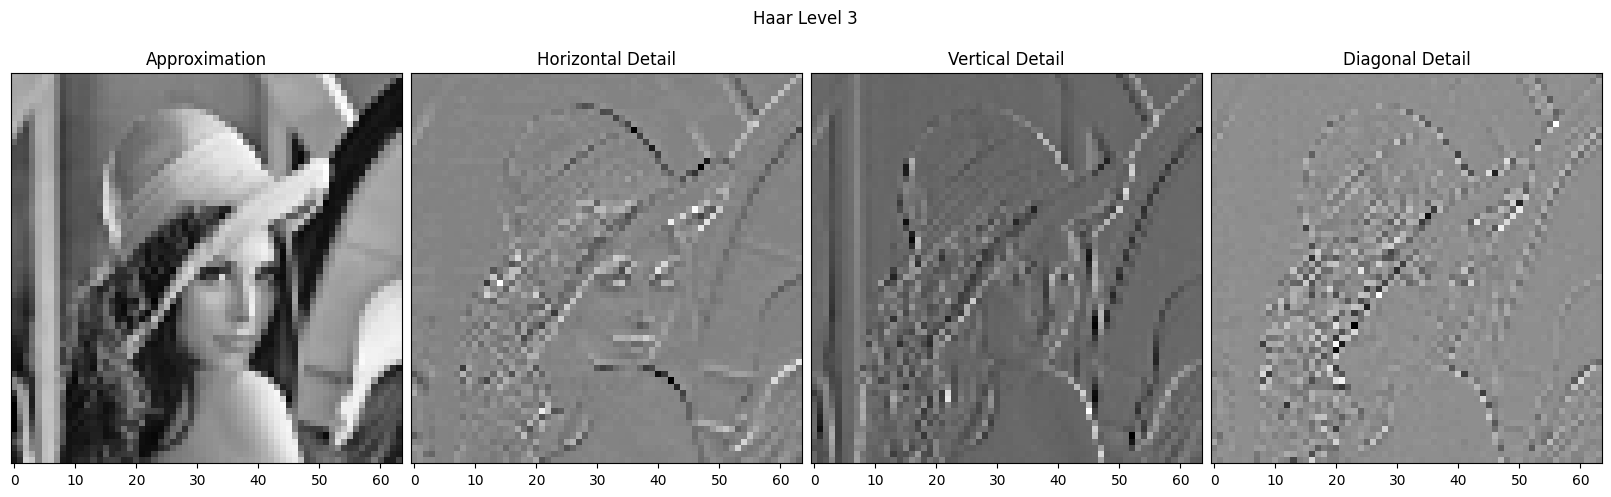

In [ ]:
# plot wavelet Haar transforms
for i in range(1,4):
  waves_haar = pywt.wavedec2(data = img2_og, wavelet = "haar", level = i)
  plot_waves(waves_haar,"Haar Level {}".format(i))

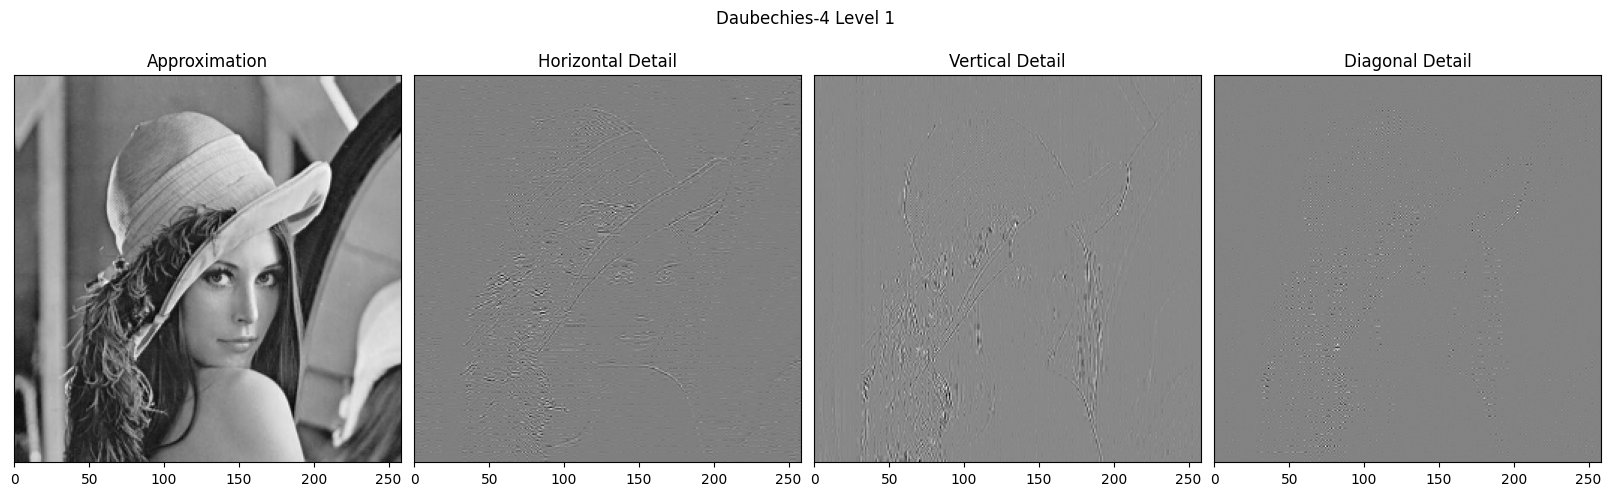

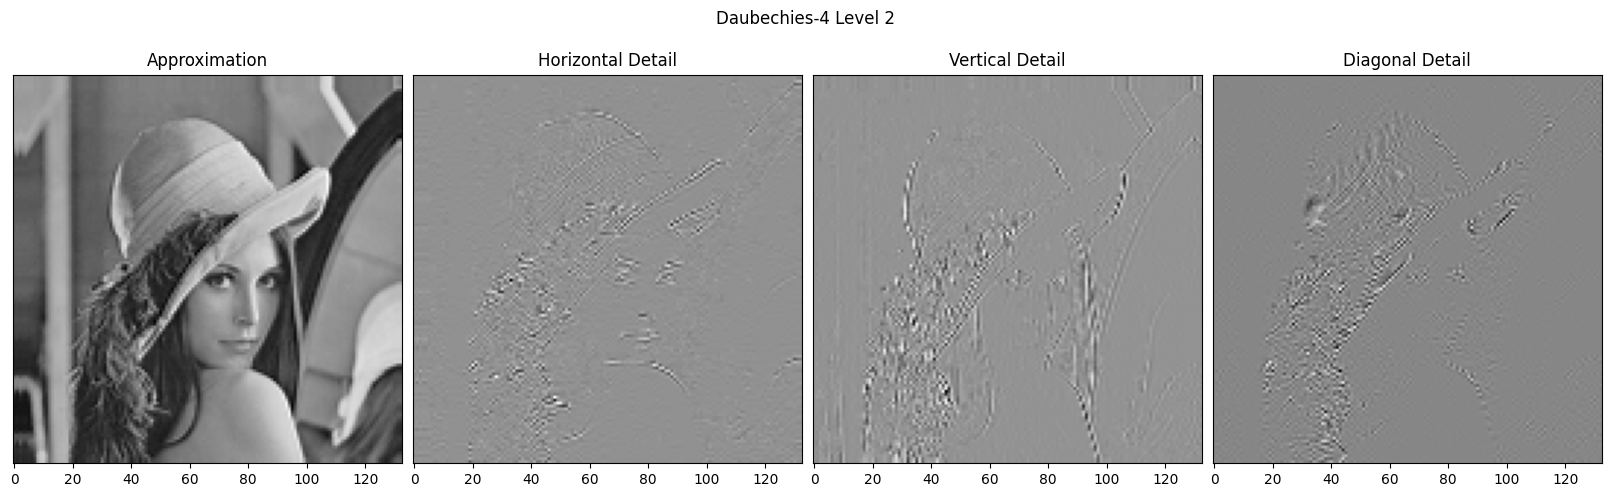

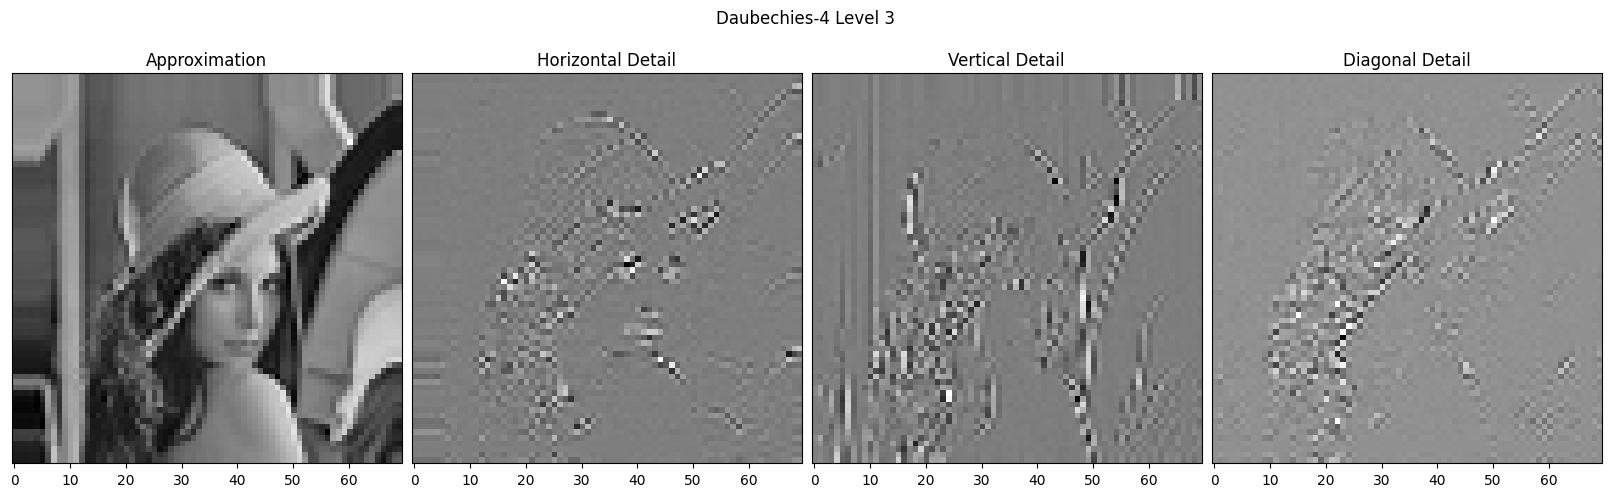

In [ ]:
# plot DB4 wavelet transforms
for i in range(1,4):
  waves_db4 = pywt.wavedec2(data = img2_og, wavelet = "db4", level = i)
  plot_waves(waves_db4,"Daubechies-4 Level {}".format(i))

Text(0.5, 1.0, 'Daubechies-4 Level 3')

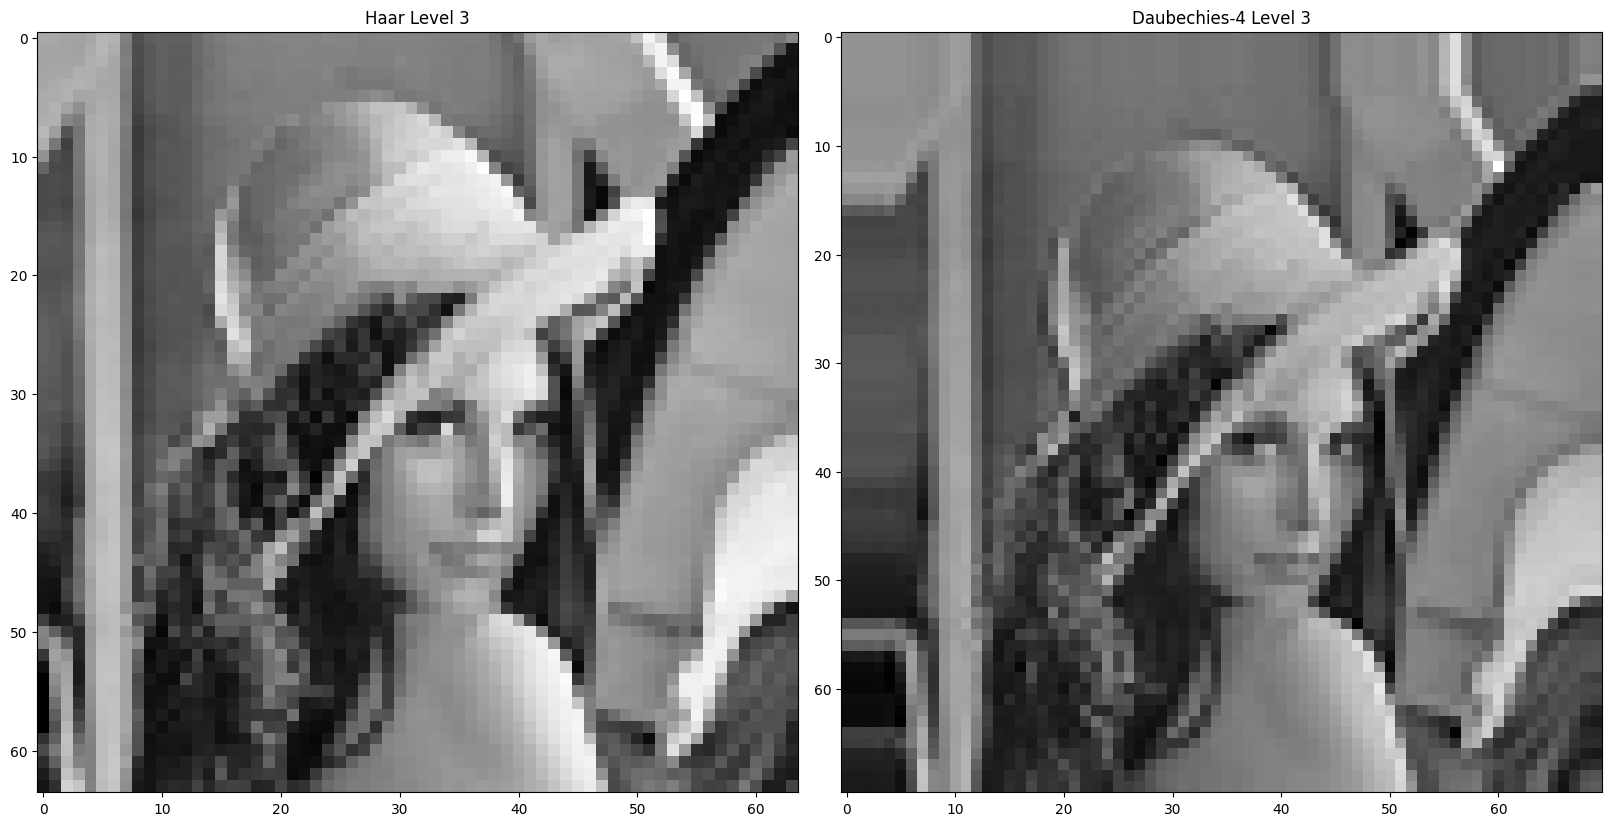

In [ ]:
# plot and compare level 3 approximation
fig, axs = plt.subplots(1,2, figsize = (16,16), constrained_layout=True)
axs[0].imshow(waves_haar[0], cmap="gray")
axs[0].set_title("Haar Level 3")
axs[1].imshow(waves_db4[0], cmap="gray")
axs[1].set_title("Daubechies-4 Level 3")